# __Beta Values__
We will use Linear Regression for this.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame({
    'Nifty Returns' : pd.read_csv('./stocks/^NSEI.csv')[::-1]['Close'].pct_change(),
    'PNB Returns' : pd.read_csv('./stocks/PNB.NS.csv')[::-1]['Close'].pct_change()
})
df = df.dropna()
df.head()

,Nifty Returns,PNB Returns
487,-0.015599,-0.027955
486,0.002295,0.016434
485,-0.004970,-0.007276
484,0.019478,0.059446
483,0.004543,0.025365


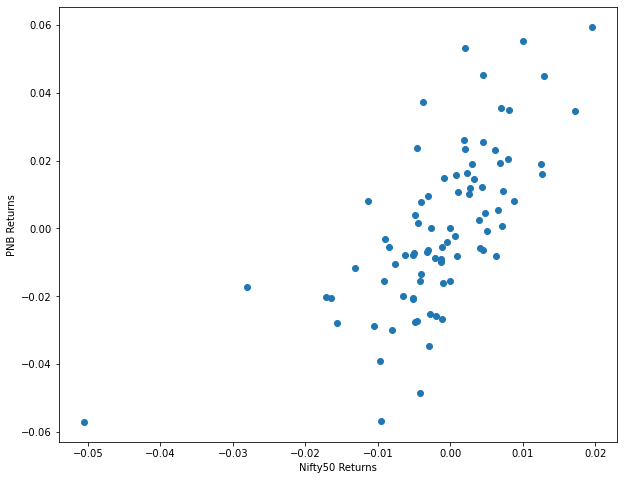

In [5]:
#plotting the graph b/w nifty index and pnb stock daily returns for last 3 months or 84 days
nifty3m = df['Nifty Returns'][:84].values
pnb3m = df['PNB Returns'][:84].values
plt.figure(figsize=(10,8))
plt.ylabel('PNB Returns')
plt.xlabel('Nifty50 Returns')
plt.scatter(nifty3m,pnb3m)

In [6]:
#fitting for last 3 months or 84 days
linreg = LinearRegression().fit(nifty3m.reshape(-1,1),pnb3m)

In [7]:
#beta value of daily returns for past 3 months or 84 days
linreg.coef_[0]

1.6992871104040612

In [8]:
nifty = pd.read_csv('./stocks/^NSEI.csv')
pnb = pd.read_csv('./stocks/PNB.NS.csv')

In [9]:
#Changing the date type from object to datetime64[ns]
nifty['Date'] = nifty['Date'].astype(np.dtype('datetime64[ns]'))
pnb['Date'] = nifty['Date'].astype(np.dtype('datetime64[ns]'))

#making a new col. of month and year
nifty['Month'] = nifty['Date'].dt.month
pnb['Month'] = pnb['Date'].dt.month
nifty['Year'] = nifty['Date'].dt.year
pnb['Year'] = pnb['Date'].dt.year

#grouping by Year and Month
group_nif = nifty.groupby(['Year','Month'])
group_pnb = pnb.groupby(['Year','Month'])

In [11]:
#getting the Close Price of the the last date of every month from nifty and pnb
nif_m = []
pnb_m = []
for year, group in group_nif:
    nif_m.append(group[group['Date'] == group['Date'].max()]['Close'].values)

for year, group in group_pnb:
    pnb_m.append(group[group['Date'] == group['Date'].max()]['Close'].values)

nif_m = np.array(nif_m)
nif_m = nif_m[:,-1]
pnb_m = np.array(pnb_m)
pnb_m = pnb_m[:,-1]

In [12]:
#creating a new dataframe for nifty and pnb monthly returns 
monthly_ret = pd.DataFrame({
    'Nifty' : nif_m,
    'PNB' : pnb_m,
    'Nifty Monthly Returns' : pd.Series(nif_m).pct_change(),
    'PNB Monthly Returns' : pd.Series(pnb_m).pct_change()
})
monthly_ret = monthly_ret.dropna()
monthly_ret.head()

,Nifty,PNB,Nifty Monthly Returns,PNB Monthly Returns
1,10492.849609,101.400002,-0.048501,-0.408229
2,10113.700195,95.300003,-0.036134,-0.060158
3,10739.349609,95.400002,0.061862,0.001049
4,10736.150391,83.650002,-0.000298,-0.123166
5,10714.299805,76.150002,-0.002035,-0.089659


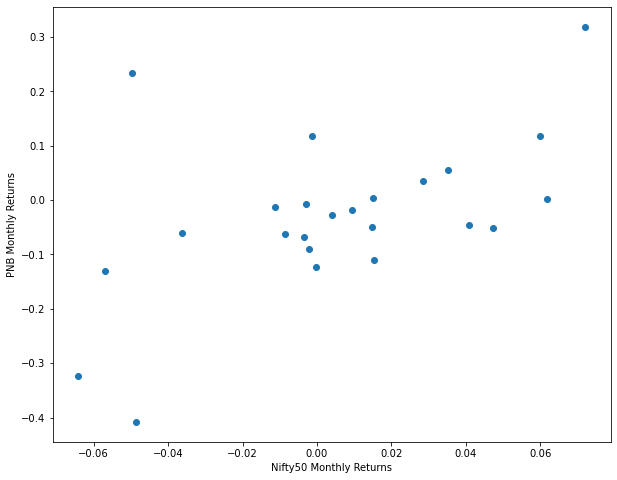

In [13]:
#plotting a graph b/w nifty and pnb monthly returns
plt.figure(figsize=(10,8))
plt.ylabel('PNB Monthly Returns')
plt.xlabel('Nifty50 Monthly Returns')
plt.scatter(monthly_ret['Nifty Monthly Returns'].values, monthly_ret['PNB Monthly Returns'].values)

In [14]:
#fitting the model to the monthly returns of nifty and pnb
linreg = LinearRegression().fit(monthly_ret['Nifty Monthly Returns'].values.reshape(-1,1), monthly_ret['PNB Monthly Returns'].values)

In [15]:
#monthly beta value
linreg.coef_[0]

2.1267521995371585

* Beta values are the values or factor of relationship b/w the a stock and whole market(for whole market we take market index).
* In the Section 3.2 _Daily Returns for last 3 months_(3.2.1) and _Monthly Returns_(3.2.2) shows Beta values more than 2 which means if the market(index) goes up by 1, stock of _PNB_ will go up twice as much(in the above scenarios) and if the market(index) goes down by 1 _PNB_ will go down twice as much.
* Market Index like _Nifty50_ or _Sensex_ has the Beta value of 1 and with respect to these market indexes, Beta value of any stock is determined.
* If the Beta value is negative then type of relationship is negative which means if market(index) goes up, the stock will go down and vice-versa. 
* Stocks with higher Beta value can be risky cause if the market goes down by a little, their stocks will go down by a lot. But on the other hand they have higher returns.